## Some introduction to `shapely`

we have covered geopandas - a great library to handle spatial data. 

here we discuss `shapely`. We will use different packages:

- `shapely`: For geometric operations.
- `pyshp`: To read and write shapefiles.
- `matplotlib`: For visualization.

In [38]:
#!pip install shapely pyshp matplotlib
#!pip install cartopy

## Reading a Shapefile Using pyshp

- `pyshp` library to read a shapefile. 
- `pyshp` allows to extract geometries, and we can convert them into shapely objects.

In [4]:
import shapefile

# Path to the shapefile
shapefile_path = 'data/ne_110m_populated_places.shp'

# Read the shapefile using pyshp
sf = shapefile.Reader(shapefile_path)

# Access shapes and records
shapes = sf.shapes()

# Convert the first shape in the shapefile to a shapely geometry
first_shape = shapes[0]
geom = shape(first_shape.__geo_interface__)

# Print the type of geometry (Polygon, MultiPolygon, etc.)
print(f"Geometry type: {geom.geom_type}")
print(f"Bounds: {geom.bounds}")


Geometry type: Point
Bounds: (12.453386544971766, 41.903282179960115, 12.453386544971766, 41.903282179960115)


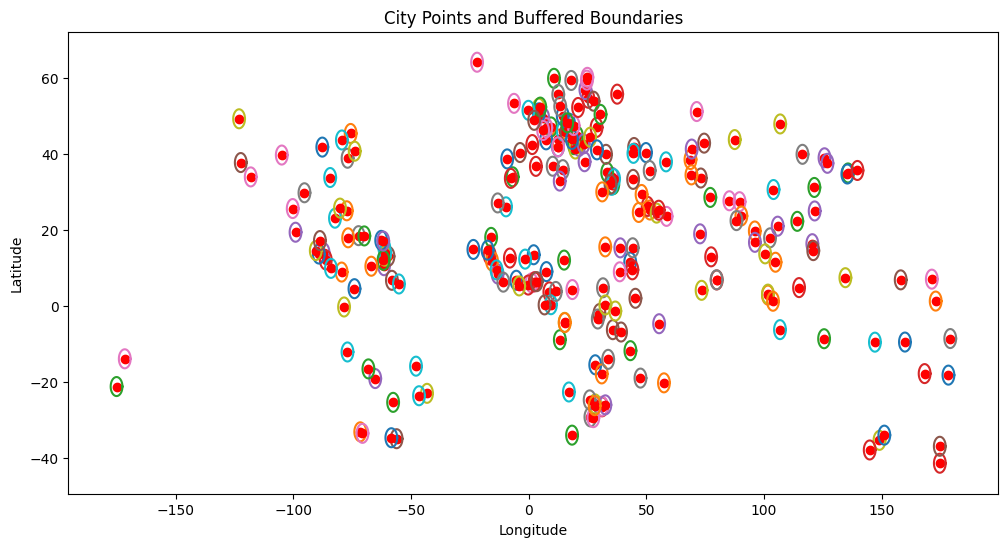

In [12]:
import matplotlib.pyplot as plt
from shapely.geometry import shape, Point

shapefile_path = 'data/ne_110m_populated_places.shp'

# Read shapefile
sf = shapefile.Reader(shapefile_path, encoding='latin1')

# Extract city geometries (points) and names from the shapefile
cities = []
for record, geom in zip(sf.records(), sf.shapes()):
    # Convert the shape into a Shapely Point object
    city_geom = shape(geom.__geo_interface__)
    
    # Get city name from the shapefile's attributes (adjust 'NAME' to match your shapefile's city name field)
    city_name = record['NAME'] if 'NAME' in record.as_dict() else 'Unknown'
    
    # Append the city geometry and name if it is a Point
    if city_geom.geom_type == 'Point':
        cities.append((city_geom, city_name))

# Plot the original points and their buffered boundaries (circular polygons)
fig, ax = plt.subplots(figsize=(12, 6))

for city_geom, city_name in cities:
    # Plot the original point
    ax.plot(city_geom.x, city_geom.y, 'ro', label=f"{city_name} (Point)")
    
    # Create a buffer (boundary) around the point
    buffer = city_geom.buffer(2.5)  # Adjust buffer radius as needed
    
    # Get the x and y coordinates of the buffered polygon and plot it
    x, y = buffer.exterior.xy
    ax.plot(x, y, label=f"{city_name} (Buffered Boundary)")

# Add title and labels
plt.title('City Points and Buffered Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.legend()

# Show the plot
plt.show()

In [ ]:
## Let's buffer the data

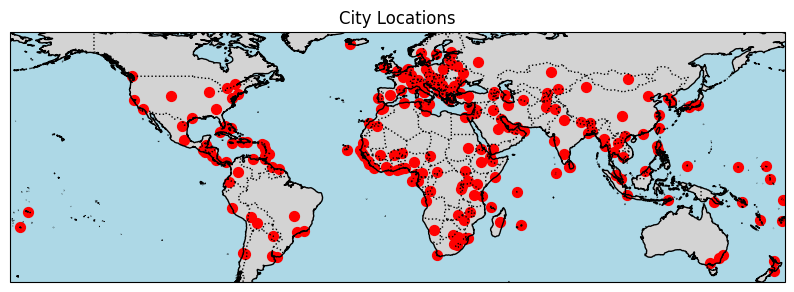

In [18]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extract city geometries (assuming points) and names from the shapefile
cities = []
for record, geom in zip(sf.records(), sf.shapes()):
    # Convert the shape into a Shapely object
    city_geom = shape(geom.__geo_interface__)
    
    # Get city name from the shapefile's attributes (adjust 'NAME' to match your shapefile's city name field)
    city_name = record['NAME'] if 'NAME' in record.as_dict() else 'Unknown'
    
    # Append the city geometry (assuming point) and name
    if city_geom.geom_type == 'Point':
        cities.append((city_geom.x, city_geom.y, city_name))

# Separate the x and y coordinates and city names
x_coords = [city[0] for city in cities]
y_coords = [city[1] for city in cities]
city_names = [city[2] for city in cities]

# Create the Cartopy plot
fig = plt.figure(figsize=(10, 8))

# Set up the map projection (PlateCarree is a simple geographic projection)
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and country borders to the map
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Optionally, add other features like land and ocean
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot the cities on the map
plt.scatter(x_coords, y_coords, color='red', marker='o', s=50, transform=ccrs.PlateCarree())

# Add a title to the map
plt.title('City Locations')

# Display the map
plt.show()

## Make heatmap

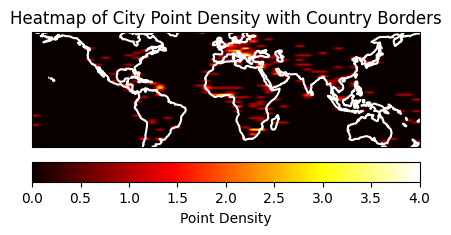

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming x_coords and y_coords are your city points
# Define the number of bins (grid size) for the heatmap
num_bins_x = 50
num_bins_y = 50

# Create 2D histogram to count points in each grid cell (density calculation)
heatmap, x_edges, y_edges = np.histogram2d(x_coords, y_coords, bins=[num_bins_x, num_bins_y])

# Set up the figure and Cartopy map projection
fig, ax = plt.subplots(figsize=(5, 4), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the heatmap using matplotlib with color bar limits
extent = [x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]]
heatmap_plot = ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot', transform=ccrs.PlateCarree())

# Add country borders and coastlines
# Add country borders and coastlines with thicker lines and brighter colors
#ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='white', linewidth=1.5)  # Thicker white borders
ax.coastlines(color='white', linewidth=1.5)  # Thicker white coastlines

# Add horizontal color bar below the map, now correctly linked to the heatmap plot
cbar = plt.colorbar(heatmap_plot, label='Point Density', orientation='horizontal', pad=0.05, ax=ax)

# Add title and labels
plt.title('Heatmap of City Point Density with Country Borders')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()
